# Importação das Bibliotecas

In [1]:
import pandas as pd
import calendar
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", None)

# Importação dos Dados

In [3]:
# Ler Arquivo csv

data_mailing = pd.read_csv(r'C:\Apresentacao\dados\data_apresentacao', low_memory=False)

In [ ]:
# Ler Excel
data_safra = pd.read_excel(r'C:\Inadimplência\Refatoração Modelo de Inadimplência\Data\extratos\JAN20.xlsx', 
                                   sheet_name='Planilha1')


In [4]:
# ver o tamanho do dataframe

data_mailing.shape

(7793124, 13)

# Visualização Inicial dos Dados

In [4]:
# Ver os 5 primeiros dados registrados

data_mailing.head()

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
0,0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,BP2,NaN
1,1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,BP,NaN
2,2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,BP2,NaN
3,3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,BP2,NaN
4,4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,MP,NaN


In [6]:
# Ver os 5 últimos dados registrados

data_mailing.tail()

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
7793119,537340,20211203,30.00,6350.58,2020-03-25,S,"PREZAO R$1,99 POR DIA",4GB Ilimitado,"39,99","30,00 A 34,99",MAIOR 90 DIAS,MP,NaN
7793120,537341,20211203,45.00,649.64,2021-08-11,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB",6GB Ilimitado,"49,99","45,00 A 49,99",MAIOR 90 DIAS,MP,NaN
7793121,537342,20211203,30.00,13577.18,2020-05-09,S,"PREZAO R$1,99 POR DIA",4GB Ilimitado,"39,99","30,00 A 34,99",MAIOR 90 DIAS,MP,NaN
7793122,537343,20211203,16.67,237.81,2019-08-16,S,"PREZAO R$1,99 POR DIA",3GB Ilimitado,"29,99","15,00 A 19,99",MAIOR 90 DIAS,MP,NaN
7793123,537344,20211203,40.00,28442.56,2019-09-06,S,"PREZAO R$1,99 POR DIA",6GB Ilimitado,"49,99","40,00 A 44,99",MAIOR 90 DIAS,MP,NaN


In [7]:
# Ver os 5 dados aleatórios

data_mailing.sample(10)

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
3981615,614972,20210801,8.33,3455.83,2020-05-01,S,"PREZAO R$14,99 2GB POR MES",PrezÃ£o 6GB,"24,99","05,00 A 09,99",PREZAO 6GB,MP,NaN
3240023,722865,20210701,10.00,0.00,2020-12-23,S,"PREZAO R$1,99 POR DIA",3GB Ilimitado,"29,99","10,00 A 14,99",MAIOR 90 DIAS ZB1,BP,NaN
379387,379387,20210401,6.67,0.88,2018-11-21,S,"PREZAO R$1,49 POR DIA",3GB Ilimitado,"29,99","05,00 A 09,99",MAIOR 90 DIAS ZB1,MP,NaN
767541,153192,20210501,36.67,1178.02,2014-03-24,S,"PREZAO R$9,99 POR SEMANA",6GB Ilimitado,"44,99","35,00 A 39,99",MAIOR 90 DIAS,MP,NaN
7321815,66036,20211203,3.33,0.00,2012-04-05,N,"PREZAO R$19,99 POR MES 3GB+3GB",PrezÃ£o 6GB,"24,99","00,00 A 04,99",PREZAO 6GB,MP,NaN
1957176,206302,20210601,6.67,0.58,2020-07-03,S,"PREZAO R$14,99 2GB POR MES",PrezÃ£o 6GB,"24,99","05,00 A 09,99",PREZAO 6GB ZB1,MP,NaN
792402,178053,20210501,20.00,0.00,2020-07-07,N,"PREZAO R$19,99 POR MES 3GB+3GB",3GB Ilimitado,"29,99","20,00 A 24,99",MAIOR 90 DIAS,MP,NaN
6821520,549740,20211201,5.00,1192.49,2020-08-14,S,"PREZAO R$1,99 POR DIA",3GB Ilimitado,"29,99","05,00 A 09,99",MAIOR 90 DIAS,MP,NaN
4729860,344899,20210901,10.00,31.89,NaN,S,"PREZAO R$19,99 POR MES 3GB+3GB",PrezÃ£o 6GB,"24,99","10,00 A 14,99",PREZAO 6GB,MP,NaN
710916,96567,20210501,10.00,269.14,2005-05-03,S,"PREZAO R$9,99 POR SEMANA",3GB Ilimitado,"29,99","10,00 A 14,99",MAIOR 90 DIAS,MP,NaN


# Verificar a Integridade dos Dados

In [8]:
data_mailing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793124 entries, 0 to 7793123
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   cod_quinzena         int64  
 2   soma_recarga         float64
 3   soma_mb_trafegado    float64
 4   dat_ativacao         object 
 5   flag_utilizou_dados  object 
 6   plano_contratado     object 
 7   ds_campo_variavel_3  object 
 8   ds_campo_variavel_4  object 
 9   ds_campo_variavel_5  object 
 10  tipo_mailing         object 
 11  marcacao_ai          object 
 12  venda                float64
dtypes: float64(3), int64(2), object(8)
memory usage: 772.9+ MB


In [31]:
data_mailing.isnull().sum().sort_values(ascending=False).head(13)

ds_campo_variavel_3    802198
ds_campo_variavel_4    802198
dat_ativacao           460820
plano_contratado        18129
soma_recarga                3
marcacao_ai                 1
cod_quinzena                0
soma_mb_trafegado           0
flag_utilizou_dados         0
ds_campo_variavel_5         0
tipo_mailing                0
venda                       0
dtype: int64

# Pré-Processamento

In [6]:
# Excluir colunas

data_mailing.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
data_mailing.head()

,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,BP2,NaN
1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,BP,NaN
2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,BP2,NaN
3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,BP2,NaN
4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,MP,NaN


In [12]:
data_mailing['ds_campo_variavel_4'] = data_mailing['ds_campo_variavel_4'].astype('float')

ValueError: could not convert string to float: '29,99'

In [22]:
# ver a quantidade de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts(dropna=False)

29.99    3823176
24.99    1695207
NaN       802198
39.99     671562
49.99     323099
34.99     252827
64.99      86906
44.99      76588
54.99      38789
41.99      18353
55.99       4419
Name: ds_campo_variavel_4, dtype: int64

In [16]:
# Trocar , por . na coluna ds_campo_variavel_4
data_mailing['ds_campo_variavel_4'].replace(',' , '.', inplace=True)

In [21]:
data_mailing['ds_campo_variavel_4'].replace(',' , '.', regex=True, inplace=True)

In [23]:
# transformar a variavel ds_campo_variavel_4 de string para float

data_mailing['ds_campo_variavel_4'] = data_mailing['ds_campo_variavel_4'].astype('float')

In [57]:
# ver a quantidade de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts(dropna=False)

29.99    3823176
24.99    1695207
NaN       802198
39.99     671562
49.99     323099
          ...   
64.99      86906
44.99      76588
54.99      38789
41.99      18353
55.99       4419
Name: ds_campo_variavel_4, Length: 11, dtype: int64

In [58]:
# ver a porcentagem de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts('mean', dropna=False)*100

29.99    49.058324
24.99    21.752599
NaN      10.293664
39.99     8.617366
49.99     4.145950
           ...    
64.99     1.115163
44.99     0.982764
54.99     0.497734
41.99     0.235502
55.99     0.056704
Name: ds_campo_variavel_4, Length: 11, dtype: float64

## Substituir os valores nulos de colunas numéricas

### Para coluna soma_mb_trafegado, vamos substituir os valores nulos pela média ou mediana?

In [27]:
data_mailing['soma_mb_trafegado'].median()

166.16

In [28]:
# Substituir os valores pela média

data_mailing['soma_mb_trafegado'].fillna(data_mailing['soma_mb_trafegado'].mean(), inplace=True)

In [ ]:
# Substituir os valores pela mediana

data_mailing['soma_mb_trafegado'].fillna(data_mailing['soma_mb_trafegado'].median(), inplace=True)

### Preencher coluna Venda

In [30]:
# Substituir os valores por 0

data_mailing['venda'].fillna(0, inplace=True)

### Excluir os Valores nulos

In [32]:
# Excluir os Valores nulos

data_mailing.dropna(subset=['soma_recarga'], inplace=True)

## Substituir os valores nulos de colunas categóricas

In [35]:
data_mailing['ds_campo_variavel_3'].value_counts('mean', dropna=False)*100

3GB Ilimitado     41.753015
PrezÃ£o 6GB       21.752607
NaN               10.293655
4GB Ilimitado      8.087312
3GB ilimitado      4.142217
PrezÃ£o 13GB       3.163084
6GB Ilimitado      3.159504
PrezÃ£o 4GB        3.127130
8GB Ilimitado      2.466945
10GB Ilimitado     1.115163
4GB ilimitado      0.530057
8GB ilimitado      0.235503
6GB ilimitado      0.117103
10GB ilimitado     0.056704
Name: ds_campo_variavel_3, dtype: float64

In [ ]:
# Substituir os valores pela média

data_mailing['ds_campo_variavel_3'].fillna(data_mailing['ds_campo_variavel_3'].mode(), inplace=True)

# Outliers !

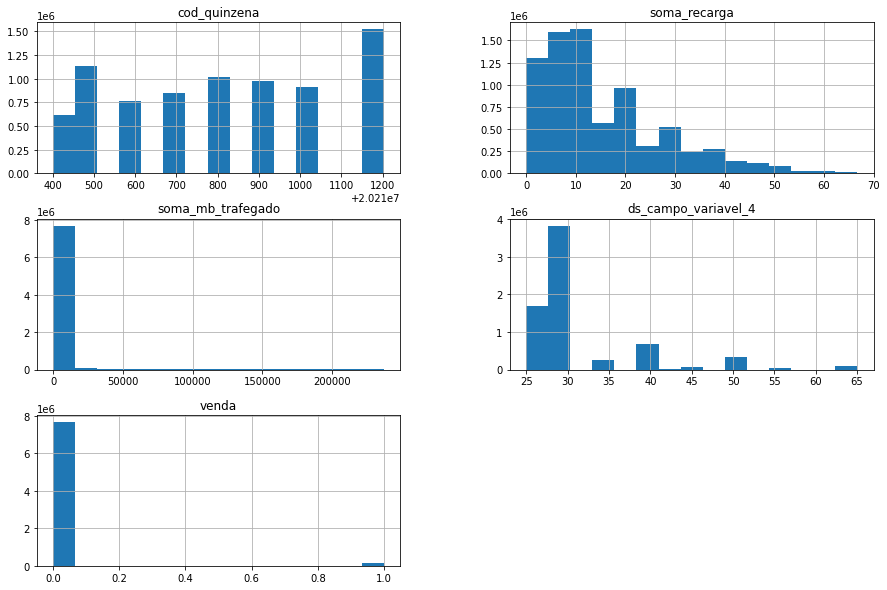

In [40]:
# plotar histograma

data_mailing.hist(bins=15, figsize=(15,10));

In [315]:
data_mailing.describe()

,cod_quinzena,soma_recarga,soma_mb_trafegado,ds_campo_variavel_4,venda,periodo_linha
count,7.793124e+06,7.793121e+06,7.793121e+06,6.990926e+06,124925.0,7.332304e+06
mean,2.021081e+07,1.557442e+01,1.750219e+03,3.162942e+01,1.0,1.206334e+03
std,2.606605e+02,1.227516e+01,3.705810e+03,7.371427e+00,0.0,1.438905e+03
min,2.021040e+07,0.000000e+00,0.000000e+00,2.499000e+01,1.0,-2.250000e+02
25%,2.021060e+07,6.670000e+00,1.000000e-02,2.999000e+01,1.0,1.730000e+02
50%,2.021080e+07,1.333000e+01,1.661600e+02,2.999000e+01,1.0,5.880000e+02
75%,2.021100e+07,2.000000e+01,1.672430e+03,2.999000e+01,1.0,1.920000e+03
max,2.021120e+07,6.667000e+01,2.371333e+05,6.499000e+01,1.0,6.380000e+03


In [41]:
data_mailing['soma_mb_trafegado'].mean()

1750.2187817653537

In [42]:
data_mailing['soma_mb_trafegado'].median()

166.16

## soma_recarga

In [93]:
# Verificar o limite inferior e superior

q1_linha = data_mailing.soma_recarga.quantile(.25)
q3_linha = data_mailing.soma_recarga.quantile(.75)
Iqr_linha = q3_linha - q1_linha
sup_linha = q3_linha + 1.5*Iqr_linha
inf_linha = q1_linha - 1.5*Iqr_linha

print("Iqr da variável soma_recarga: ", Iqr_linha)
print("Limite Superior de atributo: ", sup_linha)
print("Limite Inferior de atributo: ", inf_linha)

Iqr da variável soma_recarga:  13.33
Limite Superior de atributo:  39.995000000000005
Limite Inferior de atributo:  -13.325000000000001


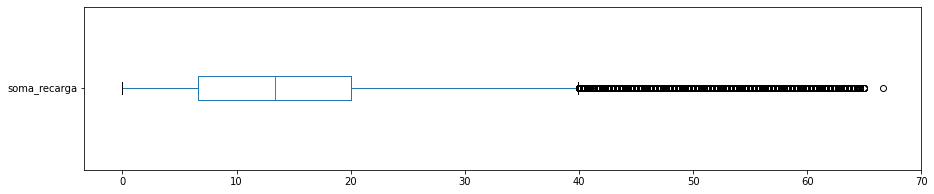

soma_recarga: valores acima de 39.9:
Entradas: 538176
Porcentagem: 6.9058%


In [92]:
# boxplot

data_mailing.soma_recarga.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores 
print("soma_recarga: valores acima de 39.9:")
print("Entradas: {}".format(len(data_mailing[data_mailing.soma_recarga>39.9])))
print("Porcentagem: {:.4f}%".format((len(data_mailing[data_mailing.soma_recarga>39.9]) / data_mailing.shape[0])*100))

## soma_mb_trafegado

In [94]:
# Verificar o limite inferior e superior 

q1_soma = data_mailing.soma_mb_trafegado.quantile(.25)
q3_soma = data_mailing.soma_mb_trafegado.quantile(.75)
Iqr_soma = q3_soma - q1_soma
sup_soma = q3_soma + 1.5*Iqr_soma
inf_soma = q1_soma - 1.5*Iqr_soma

print("Iqr da variável soma_mb_trafegado: ", Iqr_soma)
print("Limite Superior de atributo: ", sup_soma)
print("Limite Inferior de atributo: ", inf_soma)

Iqr da variável soma_mb_trafegado:  1672.42
Limite Superior de atributo:  4181.06
Limite Inferior de atributo:  -2508.62


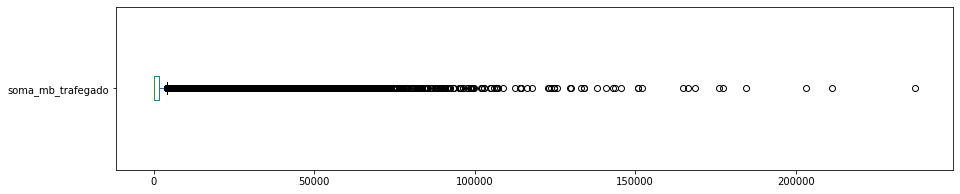

soma_mb_trafegado: valores acima de 4181.06:
Entradas: 1072320
Porcentagem: 13.7598%


In [278]:
# boxplot

data_mailing.soma_mb_trafegado.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores 
print("soma_mb_trafegado: valores acima de 4181.06:")
print("Entradas: {}".format(len(data_mailing[data_mailing.soma_mb_trafegado>4181.06])))
print("Porcentagem: {:.4f}%".format((len(data_mailing[data_mailing.soma_mb_trafegado>4181.06]) / data_mailing.shape[0])*100))

In [97]:
data_mailing.soma_mb_trafegado.median()

166.16

In [98]:
data_mailing.soma_mb_trafegado.mean()

1750.2187817653537

In [99]:
# Excluir os outliers

## data_mailing.drop(data_mailing[data_mailing['soma_mb_trafegado'] >4181].index, inplace=True)